# Problem setting

The general problem we face in machine learning is a direct consequence of the paradigm we use, that of "_empirical risk minimization_". 

In frames of this, we consider the **observed dataset as a (hopefully unbiased) sample** from the distribution that gives rise to the data, and try to capture the meaningful relationships in these observations.

We are thus directly facing the **problem of overfitting**, whereby we include **spurious relations** in our model, which **do not hold true on the unseen data of the whole distribution**, just happen to be true on our sample. Thus the **generalization** abilities of our models become very limited at best. 

## Methods for combating overfitting

There are multiple approaches in trying to counteract the effect of spurious relationships in the observed data, thus preventing overfitting:

- Changing the learning paradigm (to "generative learning" or "vicinal risk minimization")
- Utilizing holdout sets
- Doing crossvalidation

Below we will try to investigate the latter two techniques in the context of ScikitLearn.

# Holdout method aka. train (valid) test split

The concept of holdout is pretty basic: never show the full dataset you have to the training procedure, so that you have some parts of the data "held out".

The main idea here is to try **to get to an (hopefully) unbiased estimate of future performance**.

## Scikit demo

This is such a standard procedure, that there is even a ["oneliner" for it in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

print("X:",X)
print("y:",list(y))


X: [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y: [0, 1, 2, 3, 4]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
print("X_train:\t")
print(X_train)
print("----------")
print("X_test:")
print(X_test)
print("----------")
print("y_train:")
print(y_train)
print("----------")
print("y_test:")
print(y_test)

X_train:	
[[8 9]
 [2 3]
 [6 7]]
----------
X_test:
[[0 1]
 [4 5]]
----------
y_train:
[4, 1, 3]
----------
y_test:
[0, 2]


We can easily set the size of the train or the test set either as **fixed number of points (int)** or as a **ratio (float)**.

## Reproducibility

Now, one important thing to note is, that **the default setting of Scikit includes randomization of the split**!, so the full call signature is like:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=13)

In [ ]:
print("X_train:\t")
print(X_train)
print("----------")
print("X_test:")
print(X_test)
print("----------")
print("y_train:")
print(y_train)
print("----------")
print("y_test:")
print(y_test)

X_train:	
[[8 9]
 [0 1]
 [4 5]]
----------
X_test:
[[2 3]
 [6 7]]
----------
y_train:
[4, 0, 2]
----------
y_test:
[1, 3]


Where shuffle is by default `True`.

We can also observe, that for reproducibility, **we have to fix the seed for the pseudo-random generator**, so in case of repeated testing, we can compare results.

**WARNING!!!**

This is a necessary step, but we are also introducing bias into the system, so at a later stage trying out multiple seed values is essential practice!

**WARNING 2!!!**

`X_train, X_test, y_train, y_test = train_test_split(...)` is the right way!

So **two Xs first, then the to ys!!!**

Short summary of common mistakes [here](https://towardsdatascience.com/6-amateur-mistakes-ive-made-working-with-train-test-splits-916fabb421bb).

## Stratification

The main hope, on which this method hinges is, that the held out dataset is representative of future data, but since we do not have any assurance of this, we are in a bit of circular reasoning.

On the other hand, we would not like to be unfairly "punishing" the model, that is, underestimating its performance. For this, we strive to ensure that the validation dataset is similar in its distribution to the training set. This is trickier, if there is eg. a strong class imbalance involved, so the concept of **"stratification"** comes into play.  

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(30).reshape((15, 2)), list([1]*13+[0]*2)

print("X:",X)
print("y:",list(y))


X: [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]]
y: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=13)

In [ ]:
print("X_train:\t")
print(X_train)
print("----------")
print("X_test:")
print(X_test)
print("----------")
print("y_train:")
print(y_train)
print("----------")
print("y_test:")
print(y_test)
print()
print("Ratio of 1 in y in train: {0:.2f}%".format(sum(y_train)/len(y_train)*100))
print("Ratio of 1 in y in test: {0:.2f}%".format(sum(y_test)/len(y_test)*100))

X_train:	
[[ 6  7]
 [18 19]
 [16 17]
 [ 2  3]
 [ 8  9]
 [28 29]
 [12 13]
 [26 27]
 [20 21]
 [ 0  1]
 [ 4  5]]
----------
X_test:
[[14 15]
 [24 25]
 [22 23]
 [10 11]]
----------
y_train:
[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
----------
y_test:
[1, 1, 1, 1]

Ratio of 1 in y in train: 81.82%
Ratio of 1 in y in test: 100.00%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, shuffle=True, random_state=13)

In [ ]:
print("Ratio of 1 in y in train: {0:.2f}%".format(sum(y_train)/len(y_train)*100))
print("Ratio of 1 in y in test: {0:.2f}%".format(sum(y_test)/len(y_test)*100))

Ratio of 1 in y in train: 90.91%
Ratio of 1 in y in test: 75.00%


As we see, if we "stratify" on `y` at least we can try to counteract the detrimental effects of imbalance.

## Holdout split and contamination

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

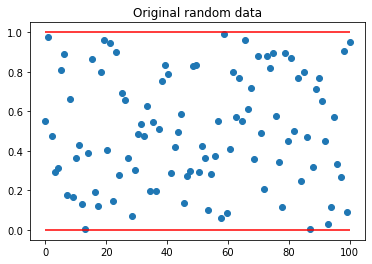

In [ ]:
arr = np.random.random_sample(100)
plt.scatter(np.linspace(0,len(arr),len(arr)),arr)
plt.title("Original random data")
plt.hlines(0,0,100, color='red')
plt.hlines(1,0,100, color='red')#X_train, X_test, y_train, y_test
plt.show()

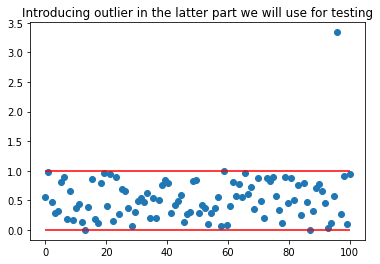

In [ ]:
arr[95] = 10*arr[95]
plt.scatter(np.linspace(0,len(arr),len(arr)),arr)
plt.title("Introducing outlier in the latter part we will use for testing")
plt.hlines(0,0,100, color='red')
plt.hlines(1,0,100, color='red')
plt.show()

In [ ]:
arr = arr.reshape(-1,1)
print("Doing train test split...")
X_train, X_test = train_test_split(arr, test_size=0.1, random_state=123, shuffle=False)

print("Train shape:",X_train.shape, "Test shape:",X_test.shape)

scaler = MinMaxScaler()
print("Fitting scaler on train, using it to transform test...")
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print("Mean:",scaler.mean_)
print("Scale:",scaler.scale_)

Doing train test split...
Train shape: (90, 1) Test shape: (10, 1)
Fitting scaler on train, using it to transform test...
Scale: [1.01383145]


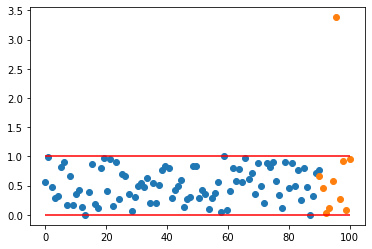

In [ ]:
plt.scatter(np.linspace(0,len(X_train),len(X_train)),X_train)
plt.scatter(np.linspace(90,len(X_test)+90,len(X_test)),X_test)
plt.hlines(0,0,100, color='red')
plt.hlines(1,0,100, color='red')
plt.show()

In [ ]:
X_train, X_test = train_test_split(arr, test_size=0.1, random_state=123, shuffle=False)

scaler_test = MinMaxScaler()
print("Fitting scaler on train, _re-fitting_ on test...")
scaler_test.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler_test.transform(X_test)

#print("Mean:",scaler_test.mean_)
print("Scale:",scaler_test.scale_)

Fitting scaler on train, _re-fitting_ on test...
Scale: [0.30230329]


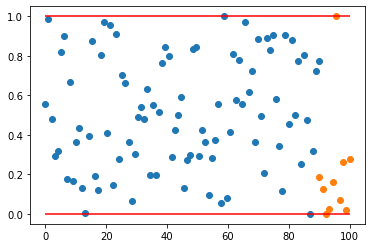

In [ ]:
plt.scatter(np.linspace(0,len(X_train),len(X_train)),X_train)
plt.scatter(np.linspace(90,len(X_test)+90,len(X_test)),X_test)
plt.hlines(0,0,100, color='red')
plt.hlines(1,0,100, color='red')
plt.show()

In [ ]:
X_train, X_test = train_test_split(arr, test_size=0.1, random_state=123, shuffle=False)

scaler_full = MinMaxScaler()
print("Fitting scaler on the whole data and using it to normalize train and test...")
scaler_full.fit(arr)
X_train = scaler_full.transform(X_train)
X_test = scaler_full.transform(X_test)

#print("Mean:",scaler_full.mean_)
print("Scale:",scaler_full.scale_)

Fitting scaler on the whole data and using it to normalize train and test...
Scale: [0.29963866]


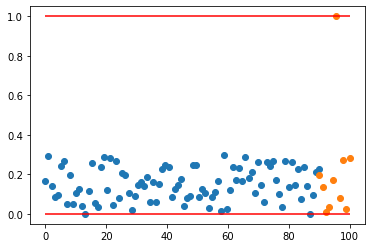

In [ ]:
plt.scatter(np.linspace(0,len(X_train),len(X_train)),X_train)
plt.scatter(np.linspace(90,len(X_test)+90,len(X_test)),X_test)
plt.hlines(0,0,100, color='red')
plt.hlines(1,0,100, color='red')
plt.show()

# Crossvalidation in Scikit

> It is recommended that you consult [sklearn's excellent user guide on cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) for the kinds of CV splitters available.

> *One* CV is for *one* specific model! For *hyperparameter tuning* (finding the optimal settings for your model), you would want to use [grid or randomized search CV](https://scikit-learn.org/stable/modules/grid_search.html).

The general idea of crossvalidation serves the purpose to minimize the usage of the validation split. In this approach, we still produce a test set, but on the training set, we repeatedly run the training, always leaving out a randomly chosen part or _"fold"_ of the train data. We then measure the performance of the different training runs on this "fold", and finally produce an estimate of the out of sample performance typically by averaging over the different test runs.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=55%>

This can be generally seen as an efficient way to ensure that the maximum amount of training data is used, but we still have an estimate of out of sample performance.

One of the extreme cases of crossvalidation is [leave one out crossvalidation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Leave-one-out_cross-validation).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/LOOCV.gif/450px-LOOCV.gif" width=45%>

**WARNING!!!**

Crossvalidation as a method is used mainly for model **hyperparameter tuning**, that is, for the evaluation of a given training procedure (since it can give a "sample" of possible validation results, thus a confidence estimate is possible). 

It is thus customary, after we choose a given learning method / setting to re-run the model training on the whole train data, **to obtain the final model**. (It should still be tested on a test dataset.)

(See some nice answers [here](https://stats.stackexchange.com/questions/11602/training-on-the-full-dataset-after-cross-validation) and [here](https://datascience.stackexchange.com/questions/56804/sckit-learn-cross-validation-and-model-retrain).

Thus in Scikit, **crossvalidation only returns "scores", not a final model.** You have to fit the model on the entire train data yourself!

(**Sub Warning:** Confusingly enough, if you use GridsearchCV, that is a kind of hyperparameter search that DOES give back a "best_model". It is the model with the best parameter setup refitted on the whole dataset you provide it with.)

In [ ]:
from sklearn import svm ## for now, we will just fit an SVM
from sklearn.datasets import load_iris  ## the well-known iris dataset to use as sample data
from sklearn.model_selection import train_test_split  ## to do an initial train-test split
## to check test set performance:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 

## the most simple splitter we will use on the train data:
from sklearn.model_selection import KFold
## the most simple way to just get a cross-validation score for one metric:
from sklearn.model_selection import cross_val_score

# Load the sample Data
iris = load_iris()

# Carry out train-test split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, test_size=0.1, random_state=123, shuffle=True)


In [ ]:
print("-------- Training ---------\n")

#Build a svm classifier model
model_svm = svm.SVC(C=100, gamma=1)
#Note, that C and gamma are the "settings" (hyperparameters) we are testing here

#Initialise the number of folds k for doing CV
kfold = KFold(n_splits=2, random_state=13, shuffle=True)
# Here the shuffle means: 
#"Whether to shuffle the data before splitting into batches. 
#Note that the samples within each split will not be shuffled."

#Evaluate the model using k-fold CV
cross_val_scores = cross_val_score(model_svm, X_train, y_train, cv=kfold, scoring='accuracy')

#Get the model performance metrics
print("Mean accuracy in crossvalidation: ", str(cross_val_scores.mean()),"\n")

# We are satisfied, so we proceed...

-------- Training ---------

Mean accuracy in crossvalidation:  0.9483099209833188 



In [ ]:
#Now fit on the whole train dataset
model_svm.fit(X_train, y_train)

#Predict on the test set
test_predictions = model_svm.predict(X_test)

print("------------- Test scores ---------\n")
print(classification_report(y_test, test_predictions, target_names=iris.target_names))

------------- Test scores ---------

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.75      0.60      0.67         5
   virginica       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



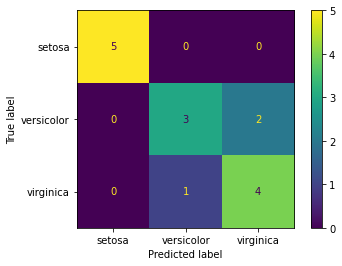

In [ ]:
# plotting nice confusion matrix for the test set
#plot_confusion_matrix(model_svm, X_test, y_test, display_labels=iris.target_names);

cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=iris.target_names)
disp.plot();

#### Extra: multiple metrics, fit times...

In [ ]:
## cross_validate allows us to use multiple metrics and know the time it takes to fit a model
from sklearn.model_selection import cross_validate
## make_scorer for using custom metrics, like f1_macro
from sklearn.metrics import f1_score, make_scorer

In [ ]:
print("-------- Training ---------\n")

#Build a svm classifier model
model_svm = svm.SVC(C=100, gamma=1)
#Note, that C and gamma are the "settings" (hyperparameters) we are testing here

#Initialise the number of folds k for doing CV
kfold = KFold(n_splits=2, random_state=13, shuffle=True)
# Here the shuffle means: 
#"Whether to shuffle the data before splitting into batches. 
#Note that the samples within each split will not be shuffled."

#Evaluate the model using k-fold CV
cross_val_scores = cross_validate(model_svm, 
                                  X_train, 
                                  y_train, 
                                  cv=kfold, 
                                  scoring={'accuracy': 'accuracy', 
                                           'f1_weighted': make_scorer(f1_score, greater_is_better=True, average="weighted"),
                                           'f1_macro': make_scorer(f1_score, greater_is_better=True, average="macro"),
                                           } )

#Get the model performance metrics
print("Mean metrics in crossvalidation:\n")
display({k: cross_val_scores[k].mean() for k in cross_val_scores.keys()})


-------- Training ---------

Mean metrics in crossvalidation:



{'fit_time': 0.0020238161087036133,
 'score_time': 0.0035704374313354492,
 'test_accuracy': 0.9483099209833188,
 'test_f1_macro': 0.9492525749703764,
 'test_f1_weighted': 0.9483715808673981}

#### Extra: the train and test samples in CV

Use the `.split()` method of the CV splitter, which iterates over train, test *indices*.

In [ ]:
import pandas as pd ## just to make displaying nicer

In [ ]:
## two splits, shuffle the samples before splitting
kfold = KFold(n_splits=2, random_state=13, shuffle=True)

## i is just used to keep track of which fold we're in
i = 0
for train_index, test_index in kfold.split(X_train):
    
    i+=1
    print("--- Fold", i, "---")

    ## use train and test indices to get the train and test (=for us, validation) samples in EACH FOLD
    X_tr, X_val = X_train[train_index], X_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    
    ## display the samples in a pandas dataframe
    print("...train set:")
    tmp = pd.concat([pd.DataFrame(X_tr, index=train_index), pd.Series(y_tr, index=train_index, name="target")], axis=1)
    tmp.index.name = "sample index"
    display(tmp)
    print("...validation set:")
    tmp = pd.concat([pd.DataFrame(X_val, index=test_index), pd.Series(y_val, index=test_index, name="target")], axis=1)
    tmp.index.name = "sample index"
    display(tmp)
    print()

--- Fold 1 ---
...train set:


,0,1,2,3,target
sample index,,,,,
0,5.0,3.2,1.2,0.2,0
1,5.1,3.8,1.9,0.4,0
2,6.4,2.8,5.6,2.2,2
5,6.1,3.0,4.6,1.4,1
6,5.6,2.5,3.9,1.1,1
...,...,...,...,...,...
127,6.4,2.8,5.6,2.1,2
130,5.1,3.8,1.6,0.2,0
131,6.0,2.7,5.1,1.6,1


...validation set:


,0,1,2,3,target
sample index,,,,,
3,6.4,3.2,4.5,1.5,1
4,4.8,3.4,1.6,0.2,0
8,6.7,3.3,5.7,2.5,2
9,7.0,3.2,4.7,1.4,1
12,6.3,2.9,5.6,1.8,2
...,...,...,...,...,...
122,6.7,2.5,5.8,1.8,2
124,6.9,3.1,5.4,2.1,2
128,6.7,3.0,5.0,1.7,1



--- Fold 2 ---
...train set:


,0,1,2,3,target
sample index,,,,,
3,6.4,3.2,4.5,1.5,1
4,4.8,3.4,1.6,0.2,0
8,6.7,3.3,5.7,2.5,2
9,7.0,3.2,4.7,1.4,1
12,6.3,2.9,5.6,1.8,2
...,...,...,...,...,...
122,6.7,2.5,5.8,1.8,2
124,6.9,3.1,5.4,2.1,2
128,6.7,3.0,5.0,1.7,1


...validation set:


,0,1,2,3,target
sample index,,,,,
0,5.0,3.2,1.2,0.2,0
1,5.1,3.8,1.9,0.4,0
2,6.4,2.8,5.6,2.2,2
5,6.1,3.0,4.6,1.4,1
6,5.6,2.5,3.9,1.1,1
...,...,...,...,...,...
127,6.4,2.8,5.6,2.1,2
130,5.1,3.8,1.6,0.2,0
131,6.0,2.7,5.1,1.6,1


#### Hyperparameter tuning using grid search CV

In [ ]:
## for an exhaustive search of specified parameter grid using cross-validation
from sklearn.model_selection import GridSearchCV

In [ ]:
## we define the hyperparameters we want to check
parameter_space = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2,3,4],},
    ]

## instantiate then fit a grid search with KFold cross-validation
gridsearch = GridSearchCV(estimator =svm.SVC(), 
                          param_grid = parameter_space, 
                          scoring = {"accuracy": "accuracy",
                                     "f1_macro": make_scorer(f1_score, greater_is_better=True, average="macro")},
                          refit = "f1_macro", ## if we use multiple scorers, we have to choose which one will decide what the best metric is
                          cv = 5, ## if we use KFold, we can simply specify the number of splits instead of the CV splitter
                          )
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             refit='f1_macro',
             scoring={'accuracy': 'accuracy',
                      'f1_macro': make_scorer(f1_score, average=macro)})

In [ ]:
print("Best parameters:")
print(gridsearch.best_params_)

Best parameters:
{'kernel': 'linear'}


In [ ]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00094776, 0.00072451, 0.00073218, 0.00140023]),
 'mean_score_time': array([0.00126114, 0.00103526, 0.00101995, 0.00186496]),
 'mean_test_accuracy': array([0.98518519, 0.98518519, 0.97777778, 0.97777778]),
 'mean_test_f1_macro': array([0.98513932, 0.98513932, 0.97756966, 0.97770898]),
 'param_degree': masked_array(data=[--, 2, 3, 4],
              mask=[ True, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'poly', 'poly'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear'},
  {'degree': 2, 'kernel': 'poly'},
  {'degree': 3, 'kernel': 'poly'},
  {'degree': 4, 'kernel': 'poly'}],
 'rank_test_accuracy': array([1, 1, 3, 3], dtype=int32),
 'rank_test_f1_macro': array([1, 1, 4, 3], dtype=int32),
 'split0_test_accuracy': array([1., 1., 1., 1.]),
 'split0_test_f1_macro': array([1., 1., 1., 1.]),
 'split1_te

In [ ]:
## to display results in a nice, pandas dataframe:
resultsdf = pd.DataFrame(gridsearch.cv_results_)
with pd.option_context("display.max_columns", 30):
  display(resultsdf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_degree,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,0.000948,0.000291,0.001261,0.000356,linear,NaN,{'kernel': 'linear'},1.0,0.962963,1.0,1.000000,0.962963,0.985185,0.018144,1,1.0,0.962848,1.0,1.000000,0.962848,0.985139,0.018201,1
1,0.000725,0.000027,0.001035,0.000014,poly,2,"{'degree': 2, 'kernel': 'poly'}",1.0,1.000000,1.0,0.962963,0.962963,0.985185,0.018144,1,1.0,1.000000,1.0,0.962848,0.962848,0.985139,0.018201,1
2,0.000732,0.000016,0.001020,0.000010,poly,3,"{'degree': 3, 'kernel': 'poly'}",1.0,0.962963,1.0,1.000000,0.925926,0.977778,0.029630,3,1.0,0.962848,1.0,1.000000,0.925000,0.977570,0.029965,4
3,0.001400,0.000327,0.001865,0.000779,poly,4,"{'degree': 4, 'kernel': 'poly'}",1.0,0.962963,1.0,0.962963,0.962963,0.977778,0.018144,3,1.0,0.962848,1.0,0.962848,0.962848,0.977709,0.018201,3


In [ ]:
## make the parameters the index, and just display the means and ranks
resultsdf.set_index([c for c in resultsdf if c.startswith("param_")])[[c for c in resultsdf.columns if ("mean_test" in c) or ("rank_test" in c)]]

mean_test_accuracy  rank_test_accuracy  \
param_kernel param_degree                                           
linear       NaN                     0.985185                   1   
poly         2                       0.985185                   1   
             3                       0.977778                   3   
             4                       0.977778                   3   

                           mean_test_f1_macro  rank_test_f1_macro  
param_kernel param_degree                                          
linear       NaN                     0.985139                   1  
poly         2                       0.985139                   1  
             3                       0.977570                   4  
             4                       0.977709                   3

##### Using the best model

In [ ]:
from sklearn.metrics import classification_report

print("Results on test set using the best model (was refitted on whole train data)")
ypred = gridsearch.predict(X_test)
print(classification_report(y_test, ypred))

Results on test set using the best model (was refitted on whole train data)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



##### Model from parameter dictionary

In [ ]:
second_best_params = resultsdf.sort_values("mean_test_f1_macro", ascending=False)["params"].iloc[1]
print("Second best params:", second_best_params)

Second best params: {'degree': 2, 'kernel': 'poly'}


In [ ]:
## instantiate a new classifier with the parameters used 
## (note the ** to feed the key:value pairs of our dictionary one-by-one!)
clf = svm.SVC(**second_best_params)

## fit the classifier
clf.fit(X_train, y_train)

print("Results on test set using the second best model")
ypred = clf.predict(X_test)
print(classification_report(y_test, ypred))

Results on test set using the second best model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

